In [290]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons

In [291]:
###generating Data

In [292]:
X,Y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=2
    ,
    random_state=10,
)
# X,Y = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=1)
# print(X.shape,Y.shape)

(1000, 2) (1000,)


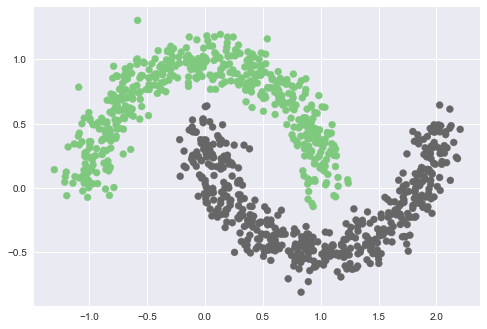

In [293]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [294]:
## Model and helper functions

In [295]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [296]:
def predict(X,weights):
    """X -> mx(n+1) matrix, w -->(nX1,) vector"""
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """Binary Cross Entropy"""
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight updates for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=1000):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    #Init Weights 0
    weights = np.zeros(X.shape[1]) #n+1 entires
    #print(weights)
    
    #Iterate over all epochs and make updates
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if epoch%10==0:
            l = loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

In [297]:
weights=train(X,Y,learning_rate=0.1,maxEpochs=1000)

Epoch 0 Loss 0.6835
Epoch 10 Loss 0.6054
Epoch 20 Loss 0.5510
Epoch 30 Loss 0.5113
Epoch 40 Loss 0.4812
Epoch 50 Loss 0.4577
Epoch 60 Loss 0.4389
Epoch 70 Loss 0.4234
Epoch 80 Loss 0.4106
Epoch 90 Loss 0.3997
Epoch 100 Loss 0.3903
Epoch 110 Loss 0.3821
Epoch 120 Loss 0.3750
Epoch 130 Loss 0.3686
Epoch 140 Loss 0.3630
Epoch 150 Loss 0.3578
Epoch 160 Loss 0.3532
Epoch 170 Loss 0.3489
Epoch 180 Loss 0.3451
Epoch 190 Loss 0.3415
Epoch 200 Loss 0.3381
Epoch 210 Loss 0.3350
Epoch 220 Loss 0.3321
Epoch 230 Loss 0.3294
Epoch 240 Loss 0.3269
Epoch 250 Loss 0.3245
Epoch 260 Loss 0.3222
Epoch 270 Loss 0.3201
Epoch 280 Loss 0.3180
Epoch 290 Loss 0.3161
Epoch 300 Loss 0.3143
Epoch 310 Loss 0.3125
Epoch 320 Loss 0.3108
Epoch 330 Loss 0.3092
Epoch 340 Loss 0.3077
Epoch 350 Loss 0.3062
Epoch 360 Loss 0.3048
Epoch 370 Loss 0.3035
Epoch 380 Loss 0.3022
Epoch 390 Loss 0.3009
Epoch 400 Loss 0.2997
Epoch 410 Loss 0.2986
Epoch 420 Loss 0.2975
Epoch 430 Loss 0.2964
Epoch 440 Loss 0.2953
Epoch 450 Loss 0.2943

In [298]:
def getpredictions(X_Test,weights,labels=True):
    if X_Test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_Test.shape[0],1))
        X_Test=np.hstack((ones,X_Test))
        

    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels

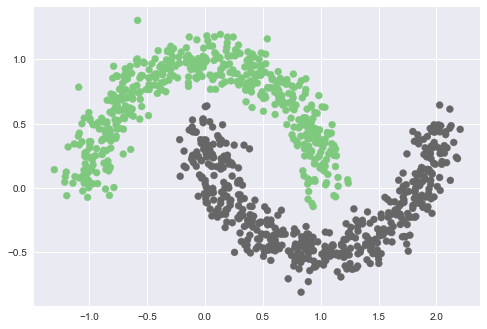

In [299]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [305]:
x1=np.linspace(-2,3,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]

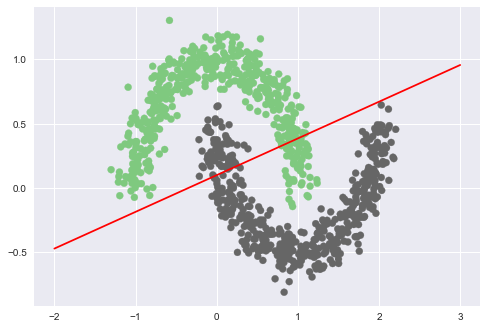

In [306]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [302]:
Y_=getpredictions(X,weights,labels=True)
training_acc=np.sum(Y_==Y)/Y.shape[0]
print(training_acc)

0.871
